In [149]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
dfcmpol = pd.read_excel("data/CPDS_1960-2019_Update_2021.xlsx")

**gov_party** 

Cabinet composition (Schmidt-Index): (1) hegemony of right-wing (and centre) parties (gov_left1=0), (2) dominance of right-wing (and centre) parties (0<gov_left1<=33.33), (3) balance of power between left and right (33.33<gov_left1<66.67), (4) dominance of social-democratic and other left parties (66.67<=gov_left1<100), (5) hegemony of social-democratic and other left parties (gov_left=100).

- Period covered: 1960-2019.
- Missing: Bulgaria 1993/94, Italy 2012, Romania 2015/16 (full technocratic governments, Partisan caretaker governments).
- Source: Own calculations according to Schmidt (1992).

[Codebook: Comparative Political Data Set, 1960-2019](https://cpds-data.org/images/Update2021/Codebook_CPDS_1960-2019_Update_2021.pdf)

In [26]:
dfcmpol.head()

,year,country,countryn,iso,iso3n,cpds1,poco,eu,emu,gov_right1,...,emprot_temp,prefisc_gini,pretran_gini,postfisc_gini,pop,pop15_64,pop65,elderly,year_13,country_13
0,1960.0,Australia,1.0,AUS,36.0,1.0,0.0,0.0,0.0,100.0,...,NaN,NaN,NaN,NaN,10249.099609,6353.600098,849.000000,8.283654,1960.0,Australia
1,1961.0,Australia,1.0,AUS,36.0,1.0,0.0,0.0,0.0,100.0,...,NaN,NaN,NaN,NaN,10452.099609,6486.899902,868.099976,8.305508,1961.0,Australia
2,1962.0,Australia,1.0,AUS,36.0,1.0,0.0,0.0,0.0,100.0,...,NaN,NaN,NaN,NaN,10649.500000,6631.100098,886.500000,8.324334,1962.0,Australia
3,1963.0,Australia,1.0,AUS,36.0,1.0,0.0,0.0,0.0,100.0,...,NaN,NaN,NaN,NaN,10851.200195,6771.700195,905.400024,8.343778,1963.0,Australia
4,1964.0,Australia,1.0,AUS,36.0,1.0,0.0,0.0,0.0,100.0,...,NaN,NaN,NaN,NaN,11071.299805,6919.500000,920.000000,8.309773,1964.0,Australia


In [159]:
cmpol = dfcmpol[["year","country","gov_party"]]
cmpol.head()

,year,country,gov_party
0,1960.0,Australia,1.0
1,1961.0,Australia,1.0
2,1962.0,Australia,1.0
3,1963.0,Australia,1.0
4,1964.0,Australia,1.0


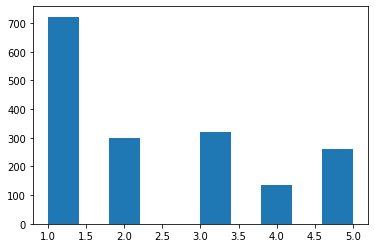

In [162]:
plt.hist(cmpol["gov_party"]);plt.show()

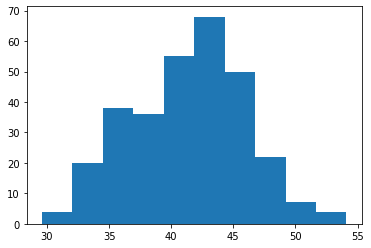

In [164]:
plt.hist(dfcmpol["prefisc_gini"]);plt.show()

In [116]:
cmpol_countries = pd.unique(cmpol["country"]).tolist()

In [78]:
dfunrob = pd.read_excel("data/robbery_0.xlsx",header=[0,1]).drop(
                columns=[('Unnamed: 0_level_0','Region'),
                         ('Unnamed: 1_level_0', 'Sub-region')])

dfunrob.head()

Unnamed: 2_level_0    2010            2011            2012            2013  \
             Country   Count    Rate   Count    Rate   Count    Rate   Count   
0            Burundi  3039.0  35.028  4266.0  47.622  4246.0  45.923  4108.0   
1              Kenya  2843.0   6.764  3262.0   7.555  3262.0   7.356  3551.0   
2         Madagascar  3131.0  14.802  2272.0  10.449  2192.0   9.809  2819.0   
3          Mauritius  1085.0  86.939   814.0  65.068     NaN     NaN     NaN   
4             Rwanda  2072.0  20.640  1766.0  17.157  2617.0  24.806  2772.0   

             2014            2015           2016           2017         
     Rate   Count    Rate   Count   Rate   Count   Rate   Count   Rate  
0  43.061  4495.0  45.662     NaN    NaN     NaN    NaN     NaN    NaN  
1   7.801  3011.0   6.448  2865.0  5.984  2654.0  5.411  2713.0  5.402  
2  12.277  2165.0   9.178  1741.0  7.184     NaN    NaN     NaN    NaN  
3     NaN     NaN     NaN     NaN    NaN     NaN    NaN     NaN    NaN  
4  25.638     NaN     NaN     NaN    NaN     NaN    NaN     NaN    NaN

In [114]:
unrob = dfunrob.melt(id_vars=[('Unnamed: 2_level_0','Country')])
unrob = unrob[unrob.variable_1!='Count']
unrob.columns=["country","year","rate","robbery_rate"]
unrob = unrob.drop(columns='rate')
unrob

,country,year,robbery_rate
127,Burundi,2010,35.028
128,Kenya,2010,6.764
129,Madagascar,2010,14.802
130,Mauritius,2010,86.939
131,Rwanda,2010,20.640
...,...,...,...
2027,Monaco,2017,NaN
2028,Netherlands,2017,47.218
2029,Switzerland,2017,20.648
2030,Australia,2017,39.044


In [125]:
unrob_countries = pd.unique(unrob["country"])
common = [v for v in cmpol_countries if v in unrob_countries]
common

['Australia',
 'Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland']

In [135]:
unrob_clean = unrob.dropna()
unrob_f = unrob_clean[unrob_clean['country'].isin(common)]
cmpol_f = cmpol[cmpol['country'].isin(common)]

In [143]:
cmpol_f[cmpol_f['year']>=2010]

,year,country,gov_party
50,2010.0,Australia,5.0
51,2011.0,Australia,5.0
52,2012.0,Australia,5.0
53,2013.0,Australia,4.0
54,2014.0,Australia,1.0
...,...,...,...
1633,2015.0,Switzerland,2.0
1634,2016.0,Switzerland,2.0
1635,2017.0,Switzerland,2.0
1636,2018.0,Switzerland,2.0


In [150]:
dfm = unrob_f.merge(cmpol_f,left_on=['country','year'],right_on=['country','year'])
dfm

,country,year,robbery_rate,gov_party
0,Canada,2010,89.253,1.0
1,Japan,2010,3.152,2.0
2,Cyprus,2010,14.016,3.0
3,Bulgaria,2010,50.330,1.0
4,Czech Republic,2010,38.142,1.0
...,...,...,...,...
262,Luxembourg,2017,76.689,3.0
263,Netherlands,2017,47.218,3.0
264,Switzerland,2017,20.648,2.0
265,Australia,2017,39.044,1.0


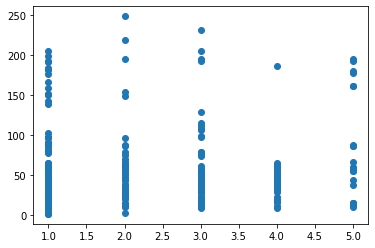

In [153]:
plt.scatter(dfm['gov_party'],dfm['robbery_rate'])
plt.show()

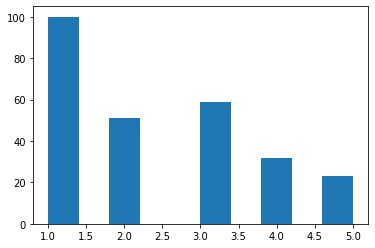

In [156]:
plt.hist(dfm['gov_party'])
plt.show()

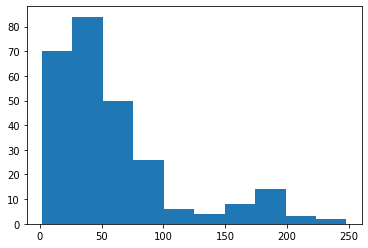

In [158]:
plt.hist(dfm['robbery_rate'])
plt.show()